In [ ]:
import numpy as np
import pandas as pd
import anndata as ad 
from scipy.sparse import csr_matrix
# import plotly.express as px
# import matplotlib.pyplot as plt
import scanpy as sc
from IPython.display import display

# Full data exploration, no heavy processing

In [2]:
anndata = ad.io.read_h5ad('../data/GSE194122_openproblems_neurips2021_cite_BMMC_processed.h5ad')

/home/denis/miniconda3/envs/seminar/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [3]:
anndata

AnnData object with n_obs × n_vars = 90261 × 14087
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id'
    uns: 'dataset_id', 'genome', 'organism'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

## X

In [4]:
anndata.X

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 141495252 stored elements and shape (90261, 14087)>

## Var

In [5]:
anndata.var

,feature_types,gene_id
AL627309.5,GEX,ENSG00000241860
LINC01409,GEX,ENSG00000237491
LINC01128,GEX,ENSG00000228794
LINC00115,GEX,ENSG00000225880
FAM41C,GEX,ENSG00000230368
...,...,...
HLA-E,ADT,ENSG00000204592
CD82,ADT,ENSG00000085117
CD101,ADT,ENSG00000134256
CD88,ADT,NaN


In [18]:
if not anndata.var.index.is_unique:
    display(anndata.var[anndata.var.index.duplicated(keep=False)].sort_index())

,feature_types,gene_id
CD101,ADT,ENSG00000134256
CD101,GEX,ENSG00000134256
CD14,ADT,ENSG00000170458
CD14,GEX,ENSG00000170458
CD163,GEX,ENSG00000177575
...,...,...
HLA-E,ADT,ENSG00000204592
KLRG1,ADT,ENSG00000139187
KLRG1,GEX,ENSG00000139187
TIGIT,ADT,ENSG00000181847


In [19]:
anndata.var['feature_types'].value_counts()

feature_types
GEX    13953
ADT      134
Name: count, dtype: int64

In [ ]:
anndata['gene_id']

In [2]:
# anndata = ad.io.read_h5ad('../data/GSE194122_openproblems_neurips2021_cite_BMMC_processed.h5ad')
# np.random.seed(42)
# batches = np.random.choice(anndata.obs['batch'].unique(), 3, replace=False)
# genes = anndata.var['gene_id'].sample(1000)
# anndata = anndata[anndata.obs['batch'].isin(batches), anndata.var['gene_id'].isin(genes)]

# anndata.write_h5ad('../data/cite_filter.h5ad')

anndata = ad.io.read_h5ad('../data/cite_filter.h5ad')

/home/denis/miniconda3/envs/seminar/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [3]:
anndata

AnnData object with n_obs × n_vars = 14612 × 1100
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id'
    uns: 'dataset_id', 'genome', 'organism'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

![img](https://www.sc-best-practices.org/_images/anndata.jpg)

In [7]:
anndata.var_names_make_unique()

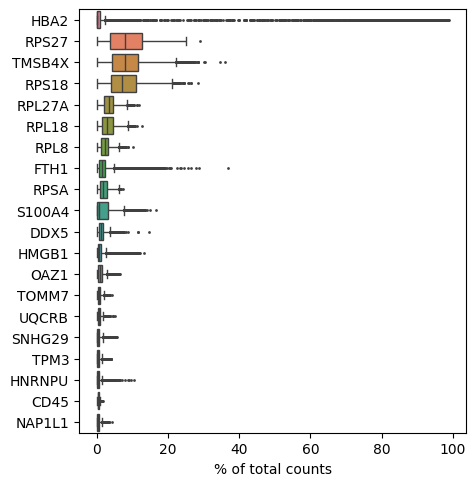

In [8]:
sc.pl.highest_expr_genes(anndata, n_top=20)

In [9]:
sc.pp.filter_cells(anndata, min_genes=200)
sc.pp.filter_genes(anndata, min_cells=3)

In [10]:
sc.tl.pca(anndata, svd_solver="arpack")

In [17]:
anndata.obs.columns

Index(['GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors',
       'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts',
       'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order',
       'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality',
       'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType',
       'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker',
       'is_train', 'n_genes'],
      dtype='object')

In [16]:
anndata.obs

,GEX_n_genes_by_counts,GEX_pct_counts_mt,GEX_size_factors,GEX_phase,ADT_n_antibodies_by_counts,ADT_total_counts,ADT_iso_count,cell_type,batch,ADT_pseudotime_order,...,DonorAge,DonorBMI,DonorBloodType,DonorRace,Ethnicity,DonorGender,QCMeds,DonorSmoker,is_train,n_genes
TACAGGTGTTAGAGTA-1-s1d1,2606,8.008829,1.292643,S,137,8819.0,21.0,CD14+ Mono,s1d1,NaN,...,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train,292
AGGATCTAGGTCTACT-1-s1d1,1867,6.959707,0.970558,G2M,116,4088.0,12.0,Naive CD20+ B IGKC+,s1d1,NaN,...,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train,227
GTAGAAAGTGACACAG-1-s1d1,2360,6.109234,1.232604,G2M,124,4447.0,9.0,HSC,s1d1,NaN,...,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train,258
TTCCGGTAGTTGTAAG-1-s1d1,2588,9.897464,1.478691,G2M,137,10418.0,11.0,CD14+ Mono,s1d1,NaN,...,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train,297
TACGCTCTCTTTGCTA-1-s1d1,1708,5.886367,0.833426,G2M,133,5397.0,15.0,Naive CD20+ B IGKC+,s1d1,NaN,...,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGGAGGAAGAAACTAC-1-s4d8,1680,9.088664,0.525232,G2M,132,8684.0,23.0,CD8+ T CD57+ CD45RA+,s4d8,NaN,...,31,32.6,A+,Black or African American,NOT HISPANIC OR LATINO,Male,False,Nonsmoker,test,213
TCGGATACAACACACT-1-s4d8,1763,5.376828,0.577726,S,135,13382.0,28.0,Naive CD20+ B IGKC+,s4d8,NaN,...,31,32.6,A+,Black or African American,NOT HISPANIC OR LATINO,Male,False,Nonsmoker,iid_holdout,227
CCTATCGCAGTTCACA-1-s4d8,1747,6.251343,0.623439,G2M,130,7848.0,12.0,CD8+ T CD57+ CD45RO+,s4d8,NaN,...,31,32.6,A+,Black or African American,NOT HISPANIC OR LATINO,Male,False,Nonsmoker,test,213
TAAGCACGTTTACGAC-1-s4d8,2758,4.674148,1.123367,G1,140,22222.0,58.0,CD14+ Mono,s4d8,NaN,...,31,32.6,A+,Black or African American,NOT HISPANIC OR LATINO,Male,False,Nonsmoker,test,296


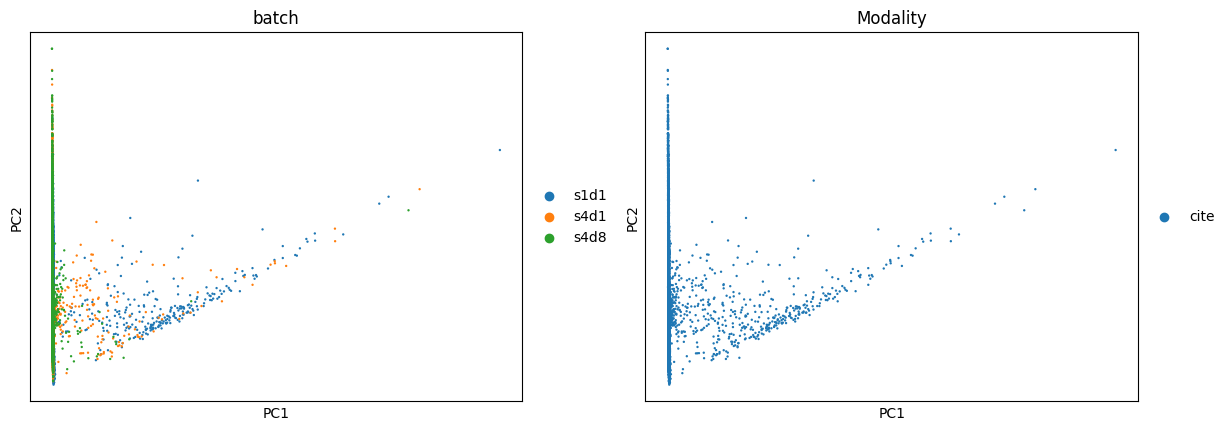

In [18]:
sc.pl.pca(anndata, color=['batch', 'Modality'])

In [15]:
sc.pp.neighbors(anndata, n_neighbors=10, n_pcs=40)

In [ ]:
sc.tl.umap(anndata)
sc.pl.umap(adata, color=["CST3", "NKG7", "PPBP"])

# Scanpy graphs

/home/denis/miniconda3/envs/sem/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca
/home/denis/miniconda3/envs/sem/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


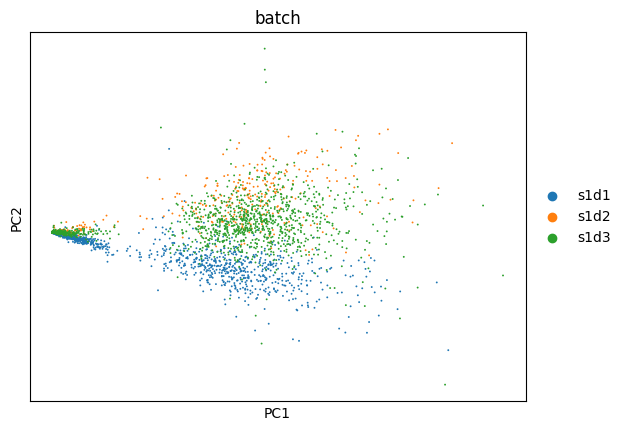

In [8]:
sc.tl.pca(anndata)
sc.pl.pca(anndata, color='batch')

/home/denis/miniconda3/envs/sem/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


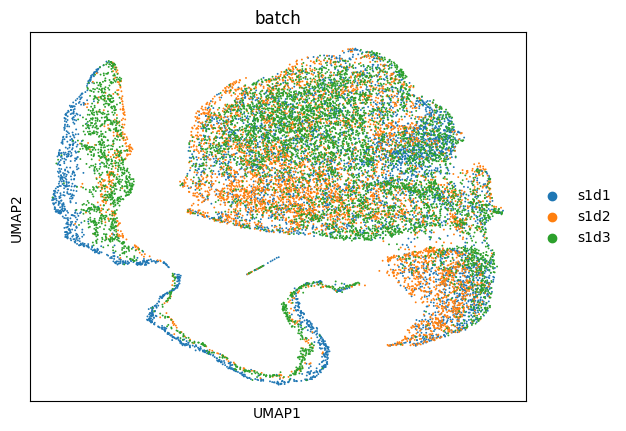

In [9]:
sc.pp.neighbors(anndata)
sc.tl.umap(anndata)
sc.pl.umap(anndata, color='batch')

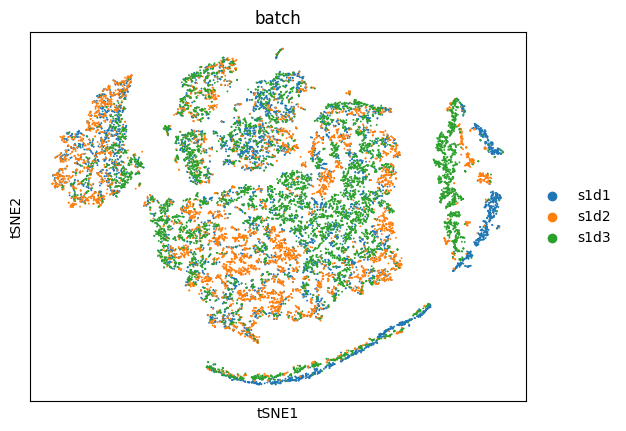

In [10]:
sc.tl.tsne(anndata)
sc.pl.tsne(anndata, color='batch')

In [11]:
anndata.var_names_make_unique()

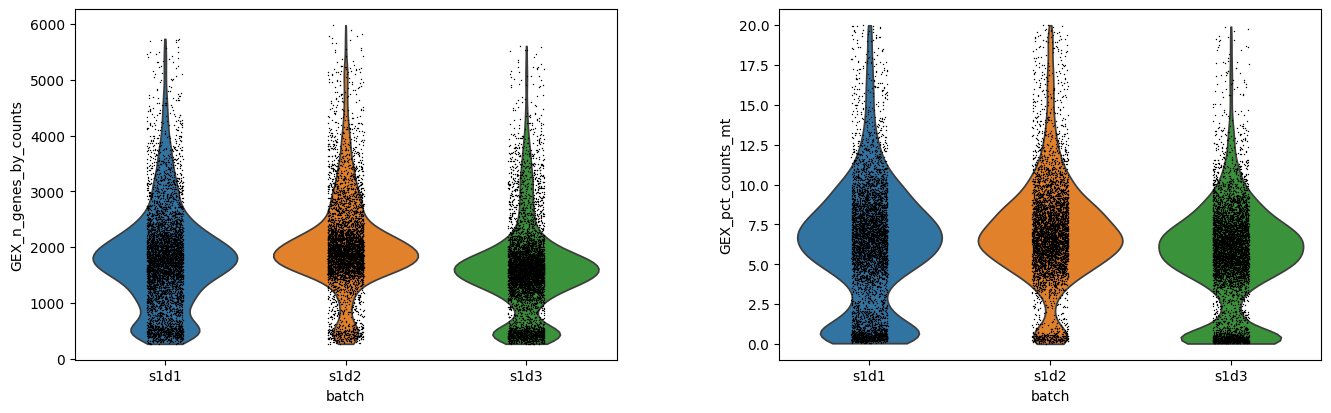

In [12]:
sc.pl.violin(anndata, ['GEX_n_genes_by_counts', 'GEX_pct_counts_mt'], groupby='batch')

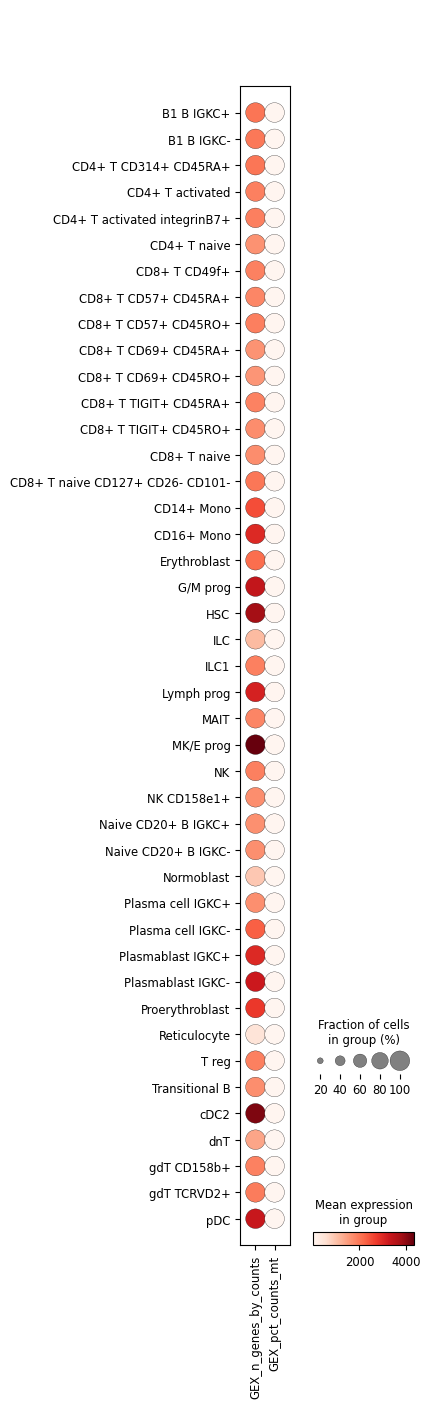

In [13]:
sc.pl.dotplot(anndata, ['GEX_n_genes_by_counts', 'GEX_pct_counts_mt'], groupby='cell_type')

## X

In [14]:
anndata.X

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 31132124 stored elements and shape (16311, 14087)>

In [15]:
anndata.X.shape

(16311, 14087)

In [16]:
# px.histogram(np.log(anndata.X.sum(axis=1).A1), nbins=100)

In [17]:
# px.histogram(np.log(anndata.X.sum(axis=0).A1), nbins=100)

In [18]:
# px.imshow(anndata.X[:1000, :1000].toarray())

## Var

In [19]:
anndata.var

,feature_types,gene_id
AL627309.5,GEX,ENSG00000241860
LINC01409,GEX,ENSG00000237491
LINC01128,GEX,ENSG00000228794
LINC00115,GEX,ENSG00000225880
FAM41C,GEX,ENSG00000230368
...,...,...
HLA-E-1,ADT,ENSG00000204592
CD82-1,ADT,ENSG00000085117
CD101-1,ADT,ENSG00000134256
CD88,ADT,NaN


In [20]:
assert anndata.X.shape[1] == anndata.var.shape[0]

In [21]:
pd.Series(anndata.var.index).value_counts()

CD224         1
AL627309.5    1
LINC01409     1
LINC01128     1
LINC00115     1
             ..
TNFRSF18      1
C1orf159      1
AGRN          1
ISG15         1
HES4          1
Name: count, Length: 14087, dtype: int64

In [22]:
anndata.var.loc['CD28']

feature_types                GEX
gene_id          ENSG00000178562
Name: CD28, dtype: object

In [23]:
anndata.var['feature_types'].value_counts()

feature_types
GEX    13953
ADT      134
Name: count, dtype: int64

In [24]:
anndata.var['gene_id'].value_counts()

gene_id
ENSG00000168329    2
ENSG00000196776    2
ENSG00000085117    2
ENSG00000139193    2
ENSG00000125810    2
                  ..
ENSG00000132003    1
ENSG00000132004    1
ENSG00000132005    1
ENSG00000132010    1
ENSG00000131873    1
Name: count, Length: 13953, dtype: int64

In [25]:
print(anndata.var.index.nunique(), anndata.var['gene_id'].nunique())

14087 13953


In [26]:
anndata.var.reset_index()[['index', 'feature_types']].value_counts()

index       feature_types
integrinB7  ADT              1
A1BG        GEX              1
A1BG-AS1    GEX              1
A2M         GEX              1
A2M-AS1     GEX              1
                            ..
AAR2        GEX              1
AAMP        GEX              1
AAMDC       GEX              1
AAK1        GEX              1
AAGAB       GEX              1
Name: count, Length: 14087, dtype: int64

In [27]:
anndata.var.reset_index()[['gene_id', 'feature_types']].value_counts()

gene_id          feature_types
ENSG00000288398  GEX              1
ENSG00000000419  GEX              1
ENSG00000000457  GEX              1
ENSG00000000460  GEX              1
ENSG00000000938  GEX              1
                                 ..
ENSG00000001461  GEX              1
ENSG00000001460  GEX              1
ENSG00000001167  GEX              1
ENSG00000001084  GEX              1
ENSG00000001036  GEX              1
Name: count, Length: 13989, dtype: int64

## varm

In [28]:
anndata.varm.to_df()

,PCs1,PCs2,PCs3,PCs4,PCs5,PCs6,PCs7,PCs8,PCs9,PCs10,...,PCs41,PCs42,PCs43,PCs44,PCs45,PCs46,PCs47,PCs48,PCs49,PCs50
AL627309.5,-4.470779e-08,4.157618e-08,-1.065315e-07,-7.344642e-08,-8.672256e-07,-3.133363e-07,-1.089938e-07,-0.000001,4.910771e-06,-0.000022,...,0.000006,0.000025,-0.000028,-0.000011,0.000077,-0.000010,0.000037,-0.000023,0.000031,-0.000043
LINC01409,-1.280440e-07,-3.607327e-07,-4.584943e-06,-1.581132e-07,4.165817e-07,-8.906459e-07,-6.358236e-07,0.000009,-6.234662e-06,0.000022,...,0.000080,-0.000041,0.000017,-0.000098,0.000233,0.000066,-0.000130,0.000697,-0.000090,0.000071
LINC01128,6.390907e-06,-2.257616e-05,3.920800e-05,7.984011e-05,-5.508461e-05,-3.954780e-06,2.288435e-05,0.000076,-6.072364e-05,0.000236,...,0.001599,0.001738,-0.002741,-0.000108,-0.001898,0.003148,-0.001370,0.003110,0.002040,-0.003282
LINC00115,2.347991e-09,-7.723794e-07,1.418206e-06,-9.018614e-07,2.119053e-06,-2.834648e-07,-6.445055e-08,-0.000016,-3.677907e-06,0.000009,...,-0.000081,0.000159,0.000072,0.000038,-0.000403,-0.000101,0.000010,0.000204,-0.000080,0.000130
FAM41C,-8.483686e-08,-5.396342e-08,-7.271939e-08,-1.893277e-07,-5.035232e-08,-4.236152e-07,-1.333167e-07,0.000004,3.795468e-07,-0.000005,...,0.000005,0.000059,0.000030,0.000015,-0.000077,-0.000068,-0.000009,0.000035,0.000021,-0.000003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HLA-E-1,-6.854858e-07,2.315651e-06,-2.756744e-06,-2.588520e-06,-3.646835e-06,-2.953472e-06,-6.221803e-06,-0.000007,-2.568007e-05,0.000102,...,-0.000099,-0.000253,0.000158,0.000067,-0.000142,0.000147,-0.000193,-0.000004,-0.000424,0.000471
CD82-1,-9.572083e-07,-1.095100e-05,-6.602173e-06,4.095159e-06,5.653754e-05,-2.689297e-05,1.429026e-05,0.000171,2.188289e-05,-0.000254,...,0.000958,0.001296,0.001155,-0.000093,-0.000710,-0.001738,-0.001148,-0.000058,0.001468,-0.002373
CD101-1,-3.133881e-06,2.834786e-06,-3.475734e-06,-6.004402e-06,-5.990347e-05,-3.813709e-05,-1.031481e-05,-0.000103,-1.100848e-04,0.000026,...,0.000132,-0.001462,-0.001482,-0.001551,0.003405,0.000574,0.000297,-0.001271,-0.001808,-0.000156
CD88,7.839616e-06,-8.491408e-06,4.641333e-05,1.170686e-05,1.825701e-04,-2.229084e-06,2.469220e-05,0.000361,1.309173e-04,-0.000471,...,0.000802,-0.000802,-0.000157,-0.001137,0.001152,-0.000355,-0.001493,-0.000102,0.000255,-0.001105


## varp

In [29]:
anndata.varp.as_dict()

/tmp/ipykernel_107090/1628115258.py:1: FutureWarning: Use dict(obj) instead of AlignedMappingBase.as_dict, AlignedMappingBase.as_dict is deprecated and will be removed in the future.
  anndata.varp.as_dict()


{}

## obs

In [30]:
anndata.obs

,GEX_n_genes_by_counts,GEX_pct_counts_mt,GEX_size_factors,GEX_phase,ADT_n_antibodies_by_counts,ADT_total_counts,ADT_iso_count,cell_type,batch,ADT_pseudotime_order,...,DonorID,DonorAge,DonorBMI,DonorBloodType,DonorRace,Ethnicity,DonorGender,QCMeds,DonorSmoker,is_train
GCATTAGCATAAGCGG-1-s1d1,893,6.723979,0.356535,G1,115,2828.0,5.0,Naive CD20+ B IGKC+,s1d1,NaN,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
TACAGGTGTTAGAGTA-1-s1d1,2606,8.008829,1.292643,S,137,8819.0,21.0,CD14+ Mono,s1d1,NaN,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
AGGATCTAGGTCTACT-1-s1d1,1867,6.959707,0.970558,G2M,116,4088.0,12.0,Naive CD20+ B IGKC+,s1d1,NaN,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
GTAGAAAGTGACACAG-1-s1d1,2360,6.109234,1.232604,G2M,124,4447.0,9.0,HSC,s1d1,NaN,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
TCCGAAAAGGATCATA-1-s1d1,455,0.294394,0.044585,S,132,12875.0,24.0,Reticulocyte,s1d1,0.735261,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AACAAAGGTTGGTACT-1-s1d3,1695,6.531035,0.973601,G2M,121,5213.0,4.0,CD8+ T naive,s1d3,NaN,...,18303,33,24.0,O+,Asian,NOT HISPANIC OR LATINO,Male,False,Smoker,train
TGACAGTCATGGCTGC-1-s1d3,2121,8.069264,1.417580,G2M,118,4419.0,3.0,CD8+ T CD57+ CD45RA+,s1d3,NaN,...,18303,33,24.0,O+,Asian,NOT HISPANIC OR LATINO,Male,False,Smoker,train
CTGGCAGGTCTCACGG-1-s1d3,2091,5.295696,1.291523,G2M,127,5475.0,15.0,CD8+ T naive,s1d3,NaN,...,18303,33,24.0,O+,Asian,NOT HISPANIC OR LATINO,Male,False,Smoker,train
GTAACCATCGGAGTGA-1-s1d3,335,0.679444,0.027234,S,116,2594.0,4.0,Reticulocyte,s1d3,0.996196,...,18303,33,24.0,O+,Asian,NOT HISPANIC OR LATINO,Male,False,Smoker,train


In [31]:
assert anndata.X.shape[0] == anndata.obs.shape[0]

In [32]:
pd.Series(anndata.obs.index).value_counts()

GAGTTGTCAGTCGGAA-1-s1d3    1
GCATTAGCATAAGCGG-1-s1d1    1
TACAGGTGTTAGAGTA-1-s1d1    1
AGGATCTAGGTCTACT-1-s1d1    1
GTAGAAAGTGACACAG-1-s1d1    1
                          ..
AGGCTGCGTGGACTGA-1-s1d1    1
TTGGATGGTTGCCGAC-1-s1d1    1
TTCGATTTCAGGACAG-1-s1d1    1
ACCTGTCAGGACTGGT-1-s1d1    1
TTCCGGTAGTTGTAAG-1-s1d1    1
Name: count, Length: 16311, dtype: int64

In [33]:
anndata.obs.describe()

,GEX_n_genes_by_counts,GEX_pct_counts_mt,GEX_size_factors,ADT_n_antibodies_by_counts,ADT_total_counts,ADT_iso_count,ADT_pseudotime_order,GEX_pseudotime_order,VendorLot,DonorID,DonorAge,DonorBMI
count,16311.000000,16311.000000,16311.000000,16311.000000,16311.000000,16311.000000,3073.000000,3131.000000,1.631100e+04,16311.000000,16311.000000,16311.000000
mean,1807.427993,6.254128,0.989712,124.326957,6633.383789,12.987064,0.798429,0.821290,3.054453e+06,15005.905953,33.930844,25.660254
std,878.890480,3.524668,0.803236,8.742173,3773.191406,8.852599,0.243788,0.243263,2.406990e+02,3041.700329,0.821462,1.976555
min,270.000000,0.019864,0.015759,83.000000,1104.000000,1.000000,0.000000,0.000000,3.054129e+06,10886.000000,33.000000,24.000000
25%,1359.000000,4.506955,0.616465,119.000000,4105.500000,7.000000,0.687789,0.741652,3.054129e+06,10886.000000,33.000000,24.000000
50%,1743.000000,6.347906,0.859901,125.000000,5577.000000,11.000000,0.954465,0.948357,3.054455e+06,15078.000000,34.000000,24.800000
75%,2149.500000,8.111165,1.141952,131.000000,8017.000000,16.000000,0.982304,0.971314,3.054716e+06,18303.000000,35.000000,28.600000
max,5976.000000,19.991383,7.834861,140.000000,25934.000000,90.000000,1.000000,1.000000,3.054716e+06,18303.000000,35.000000,28.600000


In [34]:
anndata.obs.columns

Index(['GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors',
       'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts',
       'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order',
       'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality',
       'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType',
       'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker',
       'is_train'],
      dtype='object')

In [35]:
anndata.obs['cell_type'].value_counts()

cell_type
Reticulocyte                        1813
CD4+ T activated                    1776
CD14+ Mono                          1769
CD4+ T naive                        1728
CD8+ T naive                        1236
Naive CD20+ B IGKC+                  869
NK                                   823
Naive CD20+ B IGKC-                  599
Erythroblast                         513
Normoblast                           451
CD8+ T CD57+ CD45RA+                 420
Transitional B                       416
CD4+ T activated integrinB7+         388
MAIT                                 244
gdT CD158b+                          220
CD16+ Mono                           215
HSC                                  201
NK CD158e1+                          195
Lymph prog                           181
CD8+ T CD49f+                        155
cDC2                                 151
T reg                                145
pDC                                  144
B1 B IGKC-                           142
G/M pr

In [36]:
anndata.obs['batch'].value_counts()

batch
s1d3    6106
s1d1    5227
s1d2    4978
Name: count, dtype: int64

In [37]:
anndata.obs['Modality'].value_counts()

Modality
cite    16311
Name: count, dtype: int64

In [38]:
anndata.obs['is_train'].value_counts()

is_train
train          14669
iid_holdout     1642
Name: count, dtype: int64

## obsm

In [39]:
anndata.obsm.keys()

KeysView(AxisArrays with keys: ADT_X_pca, ADT_X_umap, ADT_isotype_controls, GEX_X_pca, GEX_X_umap, X_pca, X_umap, X_tsne)

In [40]:
anndata.obsm['ADT_X_pca'].shape

(16311, 50)

In [41]:
# px.imshow(anndata.obsm['ADT_X_pca'][:1000], aspect='auto')

In [42]:
anndata.obsm['ADT_X_umap'].shape

(16311, 2)

In [43]:
# ids = np.random.choice(
#     np.arange(len(anndata.obsm['ADT_X_umap'])), 
#     1000, 
#     replace=False
# )

# px.scatter(
#     pd.DataFrame(anndata.obsm['ADT_X_umap'][ids], columns=['x', 'y']), 
#     x='x', y='y'
# )

In [44]:
anndata.obsm['ADT_isotype_controls']

,Mouse-IgG1,Mouse-IgG2a,Mouse-IgG2b,Rat-IgG2b,Rat-IgG1,Rat-IgG2a
GCATTAGCATAAGCGG-1-s1d1,0.154378,0.000000,0.000000,0.154378,0.405996,0.000000
TACAGGTGTTAGAGTA-1-s1d1,0.164562,0.272340,0.164562,0.085662,0.043748,0.125890
AGGATCTAGGTCTACT-1-s1d1,0.406494,0.406494,0.319296,0.000000,0.118126,0.000000
GTAGAAAGTGACACAG-1-s1d1,0.209837,0.209837,0.110412,0.110412,0.300264,0.000000
TCCGAAAAGGATCATA-1-s1d1,0.487043,0.918685,0.118227,0.223942,0.319543,0.118227
...,...,...,...,...,...,...
AACAAAGGTTGGTACT-1-s1d3,0.000000,0.000000,0.112242,0.112242,0.112242,0.112242
TGACAGTCATGGCTGC-1-s1d3,0.000000,0.120106,0.120106,0.000000,0.120106,0.000000
CTGGCAGGTCTCACGG-1-s1d3,0.284905,0.198652,0.437864,0.198652,0.000000,0.284905
GTAACCATCGGAGTGA-1-s1d3,0.402014,0.000000,0.000000,0.221074,0.000000,0.221074


In [45]:
anndata.obsm['ADT_isotype_controls'].describe()

,Mouse-IgG1,Mouse-IgG2a,Mouse-IgG2b,Rat-IgG2b,Rat-IgG1,Rat-IgG2a
count,16311.000000,16311.000000,16311.000000,16311.000000,16311.000000,16311.000000
mean,0.235942,0.257415,0.219191,0.129178,0.138678,0.125640
std,0.189008,0.177277,0.163317,0.120791,0.131316,0.123840
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.109620,0.132478,0.110575,0.000000,0.000000,0.000000
50%,0.201412,0.234649,0.198651,0.117134,0.121272,0.111573
75%,0.326258,0.356419,0.311700,0.197846,0.211168,0.191138
max,1.159174,1.109623,1.095961,0.872219,1.001301,1.673110


In [46]:
anndata.obsm['ADT_isotype_controls'].corr()

,Mouse-IgG1,Mouse-IgG2a,Mouse-IgG2b,Rat-IgG2b,Rat-IgG1,Rat-IgG2a
Mouse-IgG1,1.000000,0.303180,0.285149,0.181809,0.193766,0.221036
Mouse-IgG2a,0.303180,1.000000,0.233828,0.143649,0.149827,0.171142
Mouse-IgG2b,0.285149,0.233828,1.000000,0.137172,0.140536,0.157371
Rat-IgG2b,0.181809,0.143649,0.137172,1.000000,0.080907,0.095797
Rat-IgG1,0.193766,0.149827,0.140536,0.080907,1.000000,0.109867
Rat-IgG2a,0.221036,0.171142,0.157371,0.095797,0.109867,1.000000


In [47]:
# px.imshow(anndata.obsm['GEX_X_pca'][:1000], aspect='auto')

In [48]:
# px.scatter(
#     pd.DataFrame(anndata.obsm['GEX_X_umap'][ids], columns=['x', 'y']), 
#     x='x', y='y'
# )

## obsp

In [49]:
anndata.obsp.keys()

KeysView(PairwiseArrays with keys: distances, connectivities)

In [ ]:
anndata.write('../data/cite_filter.h5ad')